<a href="https://colab.research.google.com/github/ariel-j/python-learning/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Approximation of mathematical functions

## Working on the assignment, todo and not todo:
<b><u>Todo</u></b>:<br />
<div class="alert alert-success">
<ul><li>&#x2714; <b> Work by yourself</b> and submit your own assignment, <b>no pairing</b> to other students</li>
<li>&#x2714; Test and save your assignment - <b>submit the last tested and saved version</b></li>
<li>&#x2714; to <b>submit</b> the assignment, download the notebook (File → Download .ipynb in Google Colab)</li>
<li>&#x2714; submit <b>only</b> the <b>ipynb</b> file under the name <b>hw1.ipynb</b></li>
<li>&#x2714; It is advisable to add extra cells to check your code implementation</li></ul>
</div>
<b><u>Not todo</u></b>:<br />
<div class="alert alert-danger">
<ul><li>&#x2718; do <b>NOT</b> submit an <b>empty assignment</b></li>
<li>&#x2718; do <b>NOT submit extra files</b>, <u>unless you're asked to do so</u></li>
<li>&#x2718; <b>Do NOT submit a .py/.txt/.rar/.zip (or any non (.ipynb) file)</b> <u>version for the notebook</u> of the assignment</li>
<li>&#x2718; <b>do NOT change</b> the notebook file name</li></ul>
</div>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating cosine function

Function $\cos$ is defined on positive real numbers: $\cos(x): \mathcal{R} \rightarrow [-1, 1]$. The Taylor series for $\cos$ has [the following form](https://en.wikipedia.org/wiki/Sine_and_cosine):

\begin{align}\cos (x)  &= 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots \\
&= \sum_{n=1}^\infty (-1)^{n}\frac{x^{2n}}{2n!}
\end{align}



1. Implement `cos1` that approximates $\cos(x)$



In [ ]:
pi = 3.141592653589793
def cos1(x, n):
  sign = 1
  sum = 1
  fact = 1
  xi = 1
  for i in range(1, n+1):
    sign = -sign
    xi *= (x**2)
    fact *= (2*i-1)*(2*i)
    sum += sign*(xi/fact)
  return sum
"""Computes cos(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """

'Computes cos(x) with Taylor series approximation upto x^n.\n    Returns the approximate value.\n    '

 2. Plot  `np.cos` and `cos1` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.   
    

   


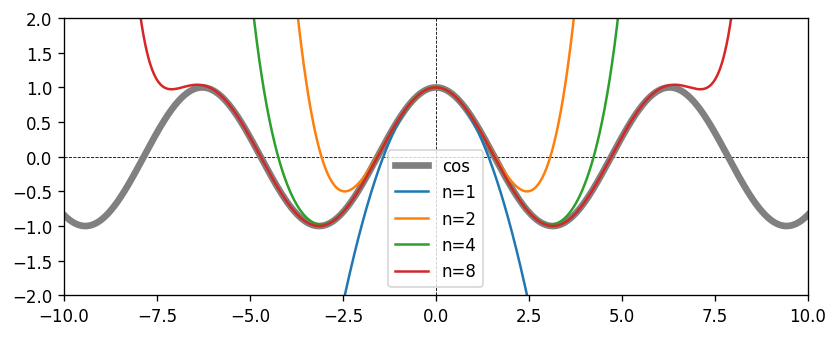

In [ ]:
def plot_fun(f, g, min=-5, max=5, logn_from=0, logn_till=4):
  # Create a vector of 10000 values equally spaced between min and max.
  x=np.linspace(min, max, 10000)
  # Prepare a canvas for the graph.
  plt.figure(figsize=(8, 3)).set_dpi(120)
  # Plot axes x=0 and y=0, dashed.
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  # Plot the 'exact' function.
  plt.plot(x, g(x), label="cos", c='gray', lw=4)
  # For each number of Taylor series terms ...
  plt.xlim(-10,10)
  plt.ylim(-2,2)
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      # Plot the Taylor approximation
      plt.plot(x, y, label=f"n={n}")
  # Display the legend
  plt.legend()

plot_fun(cos1, np.cos, min=-10, max=10)

3. Implement `cos2` that approximates $\cos(x),\,-\infty < x < \infty$ in a more efficient way. _Hint:_ $\cos (x + \pi) = - \cos(x)$.


In [ ]:
from numpy import floor
def cos2(x, n):
  sign = 1
  k = floor(x/pi)
  x -= k*pi
  if k % 2 == 1:
    sign = -sign
  return sign*cos1(x, n)


 4. Plot  `np.cos` and `cos2` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.   
    



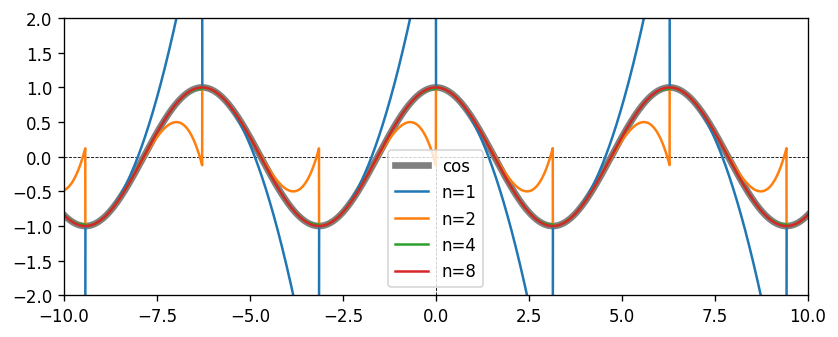

In [ ]:
plot_fun(cos2, np.cos, min=-10, max=10)

5.
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [0, 1, 2, 3]$?
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [4, 5, 6, 7]$?

Use $n=8$ for both cases

In [ ]:
print("the maximum absolute and relative errors of cos1 compared to cos2 on the set of points  x∈[0,1,2,3]")
print("n\tx\tcos\t~cos1\t~cos2\tabserr(cos1)\tabserr2(cos2)\trelerrl(cos1)\trelerr(cos2)n=====================================================================")
print("=====================================================================")
for x in [0,1,2,3]:
  me = np.cos(x)
  e = cos1(x, 8)
  e2 = cos2(x, 8)
  print(f"{8}\t{x}\t{me:.7f}\t{e:.7f}\t{e2:.7f}\t{abs(me - e):.7f}\t{abs(me - e2):.8f}\t{(abs((me - e)/me)):.8f}\t{(abs((me - e2)/me)):.8f}")
  print("---------------------------------------------------------------------")
print()
print("the maximum absolute error of cos1 compared to cos2 on the set of points  x∈[0,1,2,3] is:0.00000006 " )
print("the bigest absolute error of cos1 is:0.00000001 cos2 is:0.00000006")
print("the maximum relative error of cos1 compared to cos2 on the set of points  x∈[0,1,2,3] is:0.00000006 ")
print("the bigest relative error of cos1 is:0.00000006 cos2 is:0.00000006")
print()
print("the maximum absolute and relative errors of cos1 compared to cos2 on the set of points  x∈[4,5,6,7]")
print("n\tx\tcos\t~cos1\t~cos2\tabserr(cos1)\tabserr2(cos2)\trelerrl(cos1)\trelerr(cos2)\n=====================================================================")
print("=====================================================================")
for x in [4,5,6,7]:
  me = np.cos(x)
  e = cos1(x, 8)
  e2 = cos2(x, 8)
  print(f"{8}\t{x}\t{me:.7f}\t{e:.7f}\t{e2:.7f}\t{abs(me - e):.7f}\t{abs(me - e2):.8f}\t{(abs((me - e)/me)):.8f}\t{(abs((me - e2)/me)):.8f}")
  print("---------------------------------------------------------------------")
print("the maximum absolute error of cos1 compared to cos2 on the set of points  x∈[4,5,6,7] is:0.2247397 ")
print("the maximum relative error of cos1 compared to cos2 on the set of points  x∈[4,5,6,7] is: 0.29810190")
print()

the maximum absolute and relative errors of cos1 compared to cos2 on the set of points  x∈[0,1,2,3]
n	x	cos	~cos1	~cos2	abserr(cos1)	abserr2(cos2)	relerrl(cos1)	relerr(cos2)n=====================================================================
8	0	1.0000000	1.0000000	1.0000000	0.0000000	0.00000000	0.00000000	0.00000000
---------------------------------------------------------------------
8	1	0.5403023	0.5403023	0.5403023	0.0000000	0.00000000	0.00000000	0.00000000
---------------------------------------------------------------------
8	2	-0.4161468	-0.4161468	-0.4161468	0.0000000	0.00000000	0.00000000	0.00000000
---------------------------------------------------------------------
8	3	-0.9899925	-0.9899924	-0.9899924	0.0000001	0.00000006	0.00000006	0.00000006
---------------------------------------------------------------------

the maximum absolute error of cos1 compared to cos2 on the set of points  x∈[0,1,2,3] is:0.00000006 
the bigest absolute error of cos1 is:0.00000001 cos2 is:0.00

## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `exp2`  from [lecture 1 notebook](https://colab.research.google.com/drive/1-UKYN6p63tcqhPUg2TAUMsaJz0hUv1x0?usp=sharing) and `cos2` from Q1 to implement the function:
 $f(x)=cos(e^{x})$
 and implement the same function with `math.exp` and `np.cos`.



In [ ]:
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result

def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

def expcos1(x,n):
  return cos2(exp2(x,n),n)

def expCos(x):
  return np.cos(math.exp(x))

2. Compare both implemetations in term of <br><b>absolute error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


In [ ]:
print("x\texpCos\t~myExpCos1\terr\n=====================================================================")
for x in [10,50,100,200]:
    me = expCos(x)
    e = expcos1(x,8)
    print(f"{x}\t{me:.8f}\t{e:.8f}\t{abs(me - e):.8f}")
print("---------------------------------------------------------------------")

x	expCos	~myExpCos1	err
10	-0.72504232	-0.72504232	0.00000000
50	0.88207566	1.00000000	0.11792434
100	-0.04229862	1.00000000	1.04229862
200	0.44068899	1.00000000	0.55931101
---------------------------------------------------------------------


3. Compare both implemetations in term of <br><b>relative error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


In [ ]:
print("x\texpCos\t~ExpCos1\trelErr\n=====================================================================")
for x in [10,50,100,200]:
    me = expCos(x)
    e = expcos1(x,8)
    print(f"{x}\t{me:.8f}\t{e:.8f}\t{abs(((me - e)/me)):.8f}")
print("---------------------------------------------------------------------")

x	expCos	~ExpCos1	relErr
10	-0.72504232	-0.72504232	0.00000000
50	0.88207566	1.00000000	0.13368960
100	-0.04229862	1.00000000	24.64143593
200	0.44068899	1.00000000	1.26917401
---------------------------------------------------------------------


4. Lets define a "special" number to be an natural number $x\in \mathbb{N}$ such that $f(x) > 0$. (the function from Q2.1)
find 3 "special" numbers, x, that using the approximated $f(x)$, with `exp2` and `cos2`, it is holds that $f_{approx}(x) \leq 0$.
Use $n = 8$.


In [ ]:
def FSpecial():
  x=1
  while(expCos(x)<0 or expcos1(x,8)>0):
    x+=1
  print(x)
  x+=1
FSpecial()
#there was a corrections to only print 1 number


37


5. For which $n$ (number of Taylor series elements) the absolute difference between the <br><b>relative errors</b> of $f(10)$ computed for `n` and `n+1` and `n+1` and `n+2`  is smaller than $10^{-8}$ ?

In [ ]:
def firstN():
  n=1
  value=expCos(10)
  relative = abs(((abs(value-expcos1(10,n)/value))-(abs(value-expcos1(10,n+1))/(value))))>(10**(-8))
  relative2 = abs(((abs(value-expcos1(10,n+1))/value)-(abs(value-expcos1(10,n+2))/value)))>(10**(-8))
  while( relative or relative2 ):
    n+=1
    relative = abs(((abs(value-expcos1(10,n))/abs(value))-(abs(value-expcos1(10,n+1))/abs(value))))>(10**(-8))
    relative2 = abs(((abs(value-expcos1(10,n+1))/abs(value))-(abs(value-expcos1(10,n+2))/abs(value))))>(10**(-8))
  return n
print (firstN())


5
